In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [21]:
df = pd.read_csv('DenseNet121/DenseNet121.csv')
df['epoch'] = df.index + 1

# Create a new row with all 1s and epoch = 0
new_row = pd.DataFrame([[1]*len(df.columns)], columns=df.columns)
new_row['epoch'] = 0

# Append the new row to the DataFrame
df = pd.concat([new_row, df], ignore_index=True)


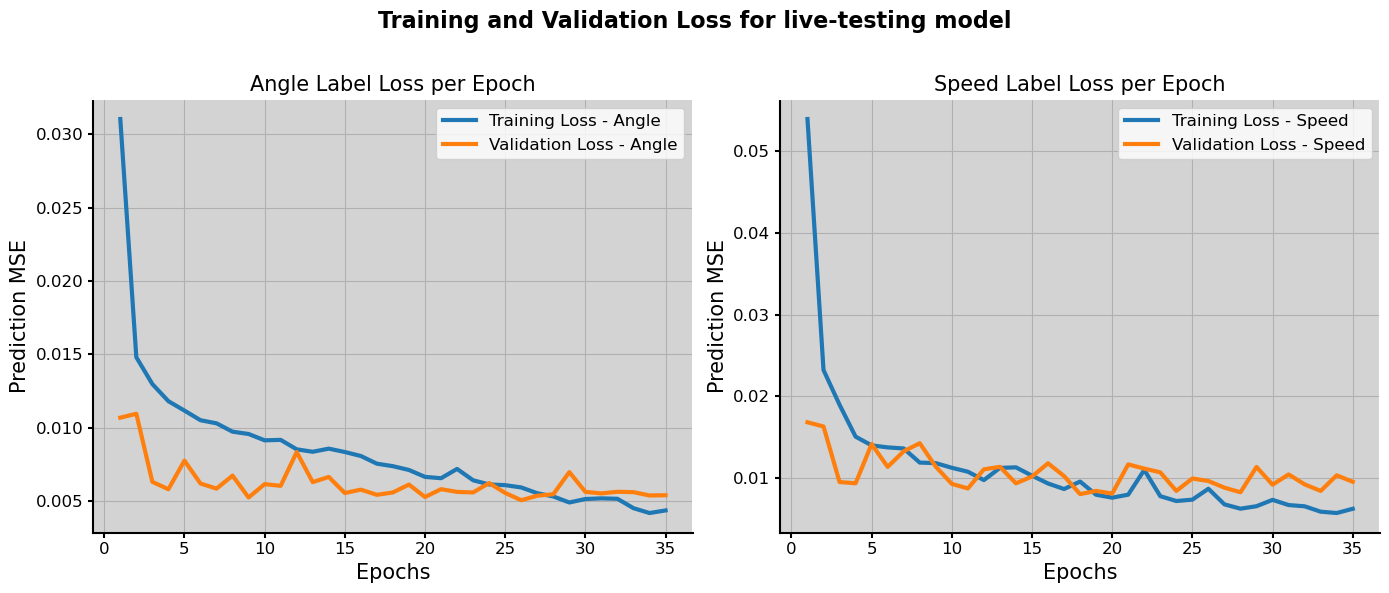

In [45]:

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))



# Plot for 'angle' labe
ax1=axes[0]
ax1.plot(df['epoch'], df['output_1_mse'], label='Training Loss - Angle', linewidth=3)
ax1.plot(df['epoch'], df['val_output_1_mse'], label='Validation Loss - Angle', linewidth=3)
ax1.set_title('Angle Label Loss per Epoch', fontsize=15)
ax1.set_xlabel('Epochs', fontsize=15)
ax1.set_ylabel('Prediction MSE', fontsize=15)
ax1.legend(fontsize='large')
ax1.grid(True)


ax2=axes[1]
ax2.plot(df['epoch'], df['output_2_mse'], label='Training Loss - Speed', linewidth=3)
ax2.plot(df['epoch'], df['val_output_2_mse'], label='Validation Loss - Speed', linewidth=3)
ax2.set_title('Speed Label Loss per Epoch', fontsize=15)
ax2.set_xlabel('Epochs', fontsize=15)
ax2.set_ylabel('Prediction MSE', fontsize=15)
ax2.legend(fontsize='large')
ax2.grid(True)
ax1.set_facecolor('lightgrey')
ax2.set_facecolor('lightgrey')


# Bold and thicken axes lines and ticks
for ax in axes:
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['right'].set_color('white')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['left'].set_color('black')
    ax.tick_params(axis='x', which='major', labelsize=15, width=1.5)
    ax.tick_params(axis='y', which='major', labelsize=15, width=1.5)

       # Make the numbers on the axes bold
    for label in ax.get_xticklabels():
        label.set_fontsize(12)
    for label in ax.get_yticklabels():
        label.set_fontsize(12)

# Add a supertitle
plt.suptitle('Training and Validation Loss for live-testing model', fontsize=16, fontweight='bold')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('live_testing_MSE.png')
